## Get timestamps

In [5]:
import re

file = open("../results/phase_3_400000ops_1_1000_stderr", "r")
lines = list(map(lambda line: line.rstrip('\n'), file.readlines()))

In [6]:
# Remove everything before "Starting test"
def get_line_with_find(lines, regex):
    for index, line in enumerate(lines):
        if line.find(regex) != -1:
            return index
    return -1


body_index = get_line_with_find(lines, 'Starting test.')

body = lines[body_index + 1:]

In [7]:
# Get only data lines
regex_pattern = re.compile(
    "^[0-9]{4}-(0[1-9]|1[0-2])-(0[1-9]|[1-2][0-9]|3[0-1]) (2[0-3]|[01][0-9]):[0-5][0-9]:[0-5][0-9]:[0-9]{3}")
data_lines = list(filter(regex_pattern.match, body))

In [8]:
# Get first and last line
first_line = data_lines[0]
last_line = data_lines[-1]

In [9]:
# Parse the timestamps
start_time_string = first_line.split()[0] + ' ' + first_line.split()[1][:12]
end_time_string = last_line.split()[0] + ' ' + last_line.split()[1][:12]

print(start_time_string)
print(end_time_string)

2019-11-19 08:51:30:283
2019-11-19 08:58:15:338


## Getting the jolokia files

In [11]:
import pandas as pd

metrics_df_node1 = pd.read_csv("../results/phase_3_400000ops_1_1000_metrics/state_100.0.0.11_1_1000", parse_dates=True, infer_datetime_format=True, skipinitialspace=True)
metrics_df_node1 = metrics_df_node1.dropna(axis='columns', how='all')

metrics_df_node1.head()

,Timestamp,MemoryUsed,ReadLatency1,ReadCount,WriteLatency1,WriteCount,PendingTasks,WaitingOnCommit1
0,2019-11-19 08:51:33.768,618416128,66.872982,268048,28.964821,24248,0,0.0
1,2019-11-19 08:51:34.894,630999040,66.872982,268459,28.964821,24263,0,0.0
2,2019-11-19 08:51:36.077,638339072,66.872982,268724,28.964821,24280,0,0.0
3,2019-11-19 08:51:37.118,643581952,66.872982,268961,28.964821,24294,0,0.0
4,2019-11-19 08:51:38.163,651970560,66.872982,269191,28.964821,24311,0,0.0


### Filter out rows that are before or after the benchmark

In [12]:
in_benchmark = (metrics_df_node1['Timestamp'] > start_time_string) & (metrics_df_node1['Timestamp'] < end_time_string)
metrics_df_node1 = metrics_df_node1[in_benchmark]

### Calculate throughput

In [13]:
metrics_df_node1['ReadThroughput'] = metrics_df_node1['ReadCount'] - metrics_df_node1['ReadCount'].shift(1)
metrics_df_node1['WriteThroughput'] = metrics_df_node1['WriteCount'] - metrics_df_node1['WriteCount'].shift(1)

metrics_df_node1 = metrics_df_node1.fillna(0)

metrics_df_node1.head()

,Timestamp,MemoryUsed,ReadLatency1,ReadCount,WriteLatency1,WriteCount,PendingTasks,WaitingOnCommit1,ReadThroughput,WriteThroughput
0,2019-11-19 08:51:33.768,618416128,66.872982,268048,28.964821,24248,0,0.0,0.0,0.0
1,2019-11-19 08:51:34.894,630999040,66.872982,268459,28.964821,24263,0,0.0,411.0,15.0
2,2019-11-19 08:51:36.077,638339072,66.872982,268724,28.964821,24280,0,0.0,265.0,17.0
3,2019-11-19 08:51:37.118,643581952,66.872982,268961,28.964821,24294,0,0.0,237.0,14.0
4,2019-11-19 08:51:38.163,651970560,66.872982,269191,28.964821,24311,0,0.0,230.0,17.0


### Plot the data

In [14]:
from matplotlib import pyplot as plt
import numpy as np
import math

%matplotlib inline

xmin = metrics_df_node1.index[0]
xmax = metrics_df_node1.index[-1]

print(xmin)
print(xmax)

0
389


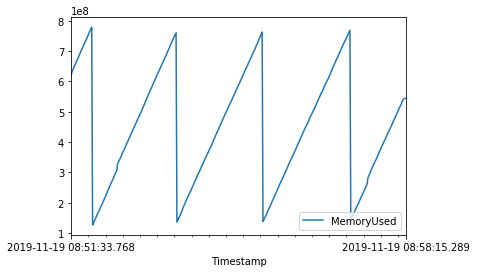

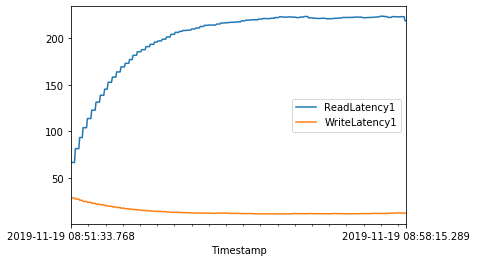

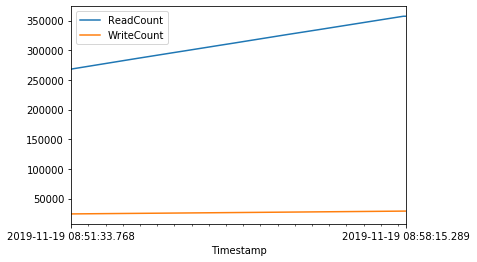

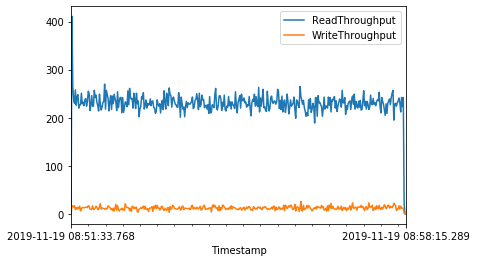

In [15]:
ax = plt.gca()
ax.xaxis.set_major_locator(plt.FixedLocator([xmin, xmax]))
ax.xaxis.set_minor_locator(plt.MultipleLocator(20))
metrics_df_node1.plot(kind='line', x='Timestamp', y='MemoryUsed', ax=ax)
plt.show()

ax = plt.gca()
ax.xaxis.set_major_locator(plt.FixedLocator([xmin, xmax]))
ax.xaxis.set_minor_locator(plt.MultipleLocator(20))
metrics_df_node1.plot(kind='line', x='Timestamp', y='ReadLatency1', ax=ax)
metrics_df_node1.plot(kind='line', x='Timestamp', y='WriteLatency1', ax=ax)
plt.show()

ax = plt.gca()
ax.xaxis.set_major_locator(plt.FixedLocator([xmin, xmax]))
ax.xaxis.set_minor_locator(plt.MultipleLocator(20))
metrics_df_node1.plot(kind='line', x='Timestamp', y='ReadCount', ax=ax)
metrics_df_node1.plot(kind='line', x='Timestamp', y='WriteCount', ax=ax)
plt.show()

ax = plt.gca()
ax.xaxis.set_major_locator(plt.FixedLocator([xmin, xmax]))
ax.xaxis.set_minor_locator(plt.MultipleLocator(20))
metrics_df_node1.plot(kind='line', x='Timestamp', y='ReadThroughput', ax=ax)
metrics_df_node1.plot(kind='line', x='Timestamp', y='WriteThroughput', ax=ax)
plt.show()